Langgraph workflow:
1. initialize model and tools
2. initialize graphs with state
3. define graph nodes
4. define entry points and edges
5. compile the graph
6. exec the graph

node = fundamental unit of exec

## setup

In [1]:
%load_ext dotenv
%dotenv

In [2]:
import os
os.environ["LANGCHAIN_PROJECT"] = "LangGraph Tutorial"

In [5]:
import jupyter_black
jupyter_black.load()

In [3]:
from typing import Annotated
from typing_extensions import TypedDict

from langgraph.graph import StateGraph
from langgraph.graph.message import add_messages

## 104. Simple LangGraph

In [4]:
class State(TypedDict):
    # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
    messages: Annotated[list, add_messages]

graph_builder = StateGraph(State)

In [6]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="gpt-4o")


def chatbot(state: State):
    return {"messages": [llm.invoke(state["messages"])]}


# The first argument is the unique node name
# The second argument is the function or object that will be called whenever
# the node is used.
graph_builder.add_node("chatbot", chatbot)

In [7]:
graph_builder.set_entry_point("chatbot")

In [8]:
graph_builder.set_finish_point("chatbot")

In [9]:
graph = graph_builder.compile()

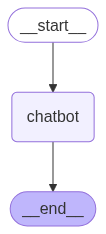

In [10]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [ ]:
while True:
    user_input = input("User: ")
    if user_input.lower() in ["quit", "exit", "q"]:
        print("Goodbye!")
        break
    for event in graph.stream({"messages": ("user", user_input)}):
        print(event["chatbot"]["messages"])
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)

User:  why is the sky blue?


[AIMessage(content="The sky appears blue primarily due to a phenomenon called Rayleigh scattering. When sunlight enters Earth's atmosphere, it collides with molecules and small particles in the air. Sunlight consists of different colors, each with its wavelength. Blue light waves are shorter and scatter more than the other colors when they strike the gas molecules in the atmosphere. This scattering causes the blue light to spread in all directions and become more visible, making the sky appear blue to our eyes.\n\nDuring sunrise or sunset, the sky can appear red or orange because the sun is lower in the sky, and its light passes through a thicker layer of the atmosphere. In this case, the shorter blue wavelengths are scattered out of the line of sight, and the longer red wavelengths dominate.", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 148, 'prompt_tokens': 13, 'total_tokens': 161, 'completion_tokens_details': {'accepted_prediction_tok

User:  why is the grass green?


[AIMessage(content="The grass appears green primarily due to the presence of chlorophyll, a pigment found in the chloroplasts of plant cells. Chlorophyll is essential for photosynthesis, the process by which plants convert light energy from the sun into chemical energy. Chlorophyll absorbs light most efficiently in the blue and red wavelengths, but it reflects and transmits the green wavelengths, which is why grass looks green to our eyes. Additionally, chlorophyll plays a crucial role in capturing light energy and facilitating the synthesis of carbohydrates, which fuel the plant's growth and metabolic functions.", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 110, 'prompt_tokens': 13, 'total_tokens': 123, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-0

User:  Summarize what did I asked you during this session.


[AIMessage(content="I'm sorry, but as an AI language model, I don't have the ability to retain or recall information from previous interactions. Each session is independent, and I don't store any personal data or conversation history. How can I assist you today?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 47, 'prompt_tokens': 19, 'total_tokens': 66, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_f33640a400', 'id': 'chatcmpl-CANdLaCCXiCkWWp9fX8CoNPERBjzV', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--4024b916-f550-41f5-a1d8-a1240debe4ea-0', usage_metadata={'input_tokens': 19, 'output_tokens': 47, 'total_tokens': 66, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_det